Dataset link :  https://data.cdc.gov/Behavioral-Risk-Factors/Behavioral-Risk-Factor-Surveillance-System-BRFSS-P/dttw-5yxu

Libraries and Packages used: pandas, matplotlib, seaborn, plotly

Software tools: Google Colab

# **Loading the data**

In [2]:
import requests
import pandas as pd
from io import StringIO

# CDC CSV URL
csv_url = "https://data.cdc.gov/api/views/dttw-5yxu/rows.csv?accessType=DOWNLOAD"

# Read into pandas
df = pd.read_csv(csv_url)

print(df.head())
#7min running time

   Year Locationabbr Locationdesc                Class                Topic  \
0  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
1  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
2  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
3  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   
4  2016           AK       Alaska  Alcohol Consumption  Alcohol Consumption   

                                            Question Response Break_Out  \
0  Adults who have had at least one drink of alco...       No     18-24   
1  Adults who have had at least one drink of alco...      Yes     18-24   
2  Adults who have had at least one drink of alco...       No     25-34   
3  Adults who have had at least one drink of alco...      Yes     25-34   
4  Adults who have had at least one drink of alco...       No     35-44   

  Break_Out_Category  Sample_Size  ...  Data_Value_Footnote  DataSource  \

# **Data Exploration**

In [3]:
# 1. Total no. of observations
df.shape

(2763102, 27)

In [ ]:
# 2a. Data distributions
pd.set_option('display.float_format', '{:.2f}'.format)
stats = df.describe().round(2)
display(stats)

,Year,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order,LocationID
count,2763102.00,2763102.00,2230768.00,2226536.00,2226536.00,2762508.00,2763102.00
mean,2017.43,639.17,40.45,37.10,43.80,791.26,30.89
std,3.61,1357.03,33.24,33.00,33.71,1251.56,17.74
min,2011.00,0.00,0.00,0.00,0.00,1.00,1.00
25%,2014.00,33.00,10.70,8.00,13.20,1.00,17.00
50%,2017.00,163.00,28.60,23.80,33.30,5.00,30.00
75%,2021.00,615.00,73.60,68.90,78.30,1390.00,45.00
max,2023.00,37492.00,100.00,100.00,100.00,4493.00,99.00


In [ ]:
#2b. type of data
df.dtypes

,0
Year,int64
Locationabbr,object
Locationdesc,object
Class,object
Topic,object
Question,object
Response,object
Break_Out,object
Break_Out_Category,object
Sample_Size,int64


In [ ]:
# 2c. target column - Data value - predicting prevalance
# percantage of people in a specific group who reported a certain behavior or condition
df['Data_value'].describe()
df['Data_value'].mean()

# Example:
df[(df['Break_Out']=='18-24') & (df['Topic'].str.contains('alcohol',case=False))& (df['Year']==2016)& (df['Response'].str.contains('yes',case=False))&(df['Locationdesc']=='California')][['Locationdesc','Question','Data_value']]
# 49% of californians responded yes if they had alcohol in past month between the age of 18-24


,Locationdesc,Question,Data_value
17166,California,Adults who have had at least one drink of alco...,49.00


In [ ]:
# 3. Missing values
df.isna().sum()

,0
Year,0
Locationabbr,0
Locationdesc,0
Class,0
Topic,0
Question,0
Response,17621
Break_Out,0
Break_Out_Category,0
Sample_Size,0


# **Data Plots**

In [4]:
# Dropping the unnecessary columns
df_cleaned = df.drop(columns=['Data_Value_Footnote_Symbol','Data_Value_Footnote','ClassId','TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID', 'QuestionID','ResponseID','GeoLocation','Data_value_type','DataSource','Data_value_unit'])

df_cleaned.head(5)

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,Display_order
0,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,18-24,Age Group,95,55.0,45.8,64.3,1.0
1,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,18-24,Age Group,80,45.0,35.7,54.2,1.0
2,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,25-34,Age Group,108,33.6,25.5,41.7,1.0
3,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,25-34,Age Group,188,66.4,58.3,74.5,1.0
4,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,35-44,Age Group,138,39.4,31.3,47.6,1.0


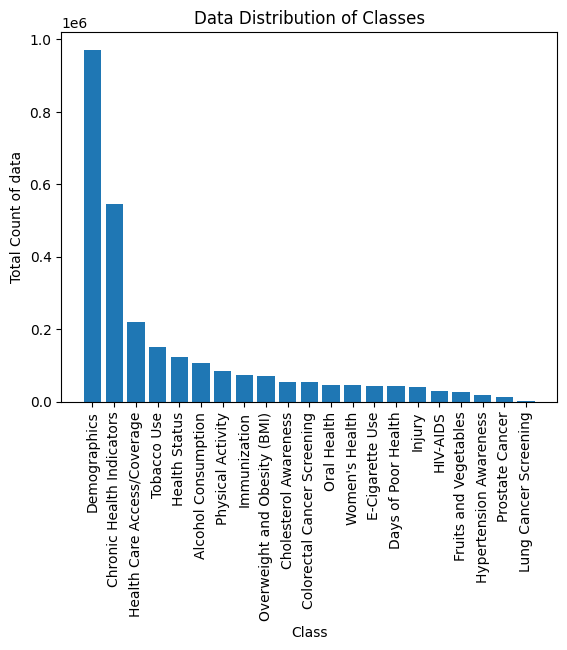

In [ ]:
# plotting Data distribution per Class

import matplotlib.pyplot as plt

df3 = df_cleaned.groupby(['Class'])['Class'].count().sort_values(ascending=False).reset_index(name='count')
plt.bar(df3['Class'],df3['count'])
plt.xticks(rotation=90)
plt.title('Data Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Total Count of data')
plt.show()

In [6]:
# creating a cancer subset and dropping the NA values
df_cancer = df_cleaned[df_cleaned['Class'].str.contains('cancer',case=False)]
print('Shape of cancer subset',df_cancer.shape)

Shape of cancer subset (67435, 14)


In [7]:
# to retain as many points as possible, filling the empty data value with its mean
df_cancer.fillna(df_cancer['Data_value'].mean(),inplace=True)

/tmp/ipython-input-2819965814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancer.fillna(df_cancer['Data_value'].mean(),inplace=True)


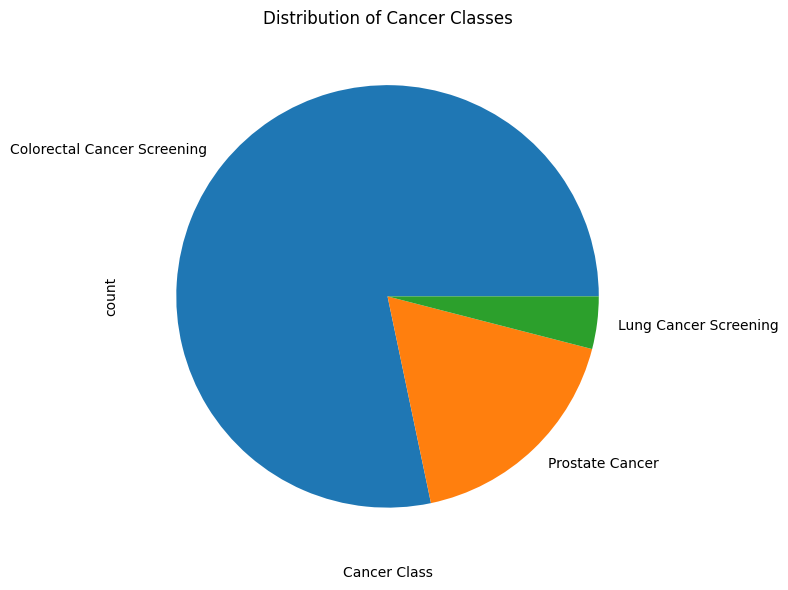

In [153]:
# distribution of class counts in cancer dataset

class_counts = df_cancer['Class'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='pie')
plt.title("Distribution of Cancer Classes")
plt.xlabel("Cancer Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [154]:
# creating filters in cancer dataset and creating new subset to visualize
Class = 'Colorectal Cancer Screening'
Topic = 'Blood Stool Test'
Question = 'Adults aged 50-75 who have had a blood stool test within the past year (variable calculated from one or more BRFSS questions)'
Break_Out_Category = 'Race/Ethnicity'

df_subset = df_cancer[(df['Class']==Class)&(df['Topic']==Topic)&(df['Question']==Question)&(df['Break_Out_Category']==Break_Out_Category)].sort_values('Year')
df_subset.shape

/tmp/ipython-input-2631873770.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subset = df_cancer[(df['Class']==Class)&(df['Topic']==Topic)&(df['Question']==Question)&(df['Break_Out_Category']==Break_Out_Category)].sort_values('Year')


(3504, 14)

In [155]:
# plotting mean prevalance in filtered cancer data in plotly
import plotly.express as px

df_mean = df_subset.groupby(['Locationabbr','Year'])['Data_value'].mean().reset_index()
fig = px.choropleth(df_mean,
                    locations='Locationabbr',
                    locationmode='USA-states',
                    color='Data_value',
                    color_continuous_scale='Viridis',
                    range_color=(0,df['Data_value'].max()),
                    scope='usa',
                    animation_frame='Year',
                    labels={'Data_value':'Prevalance %'},
                    title = 'Colorectal Cancer Screening (Blood Stool Test, Age 50–75) by Race/Ethnicity'
                    )
fig.update_layout(margin={'r':0,'t':50,'l':0,'b':0})
fig.show()

# **Model 1**

Creating a subset of cancer dataset by selecting specific cancer class and topic values to focus the analyis on a particular type of cancer screening. This filtering will allow us to isolate relevant observations, reduce noise from unrelated cancer types and reflect meaningful patterns in the screening rates.

In [8]:
# choosing filters manually
Class = 'Colorectal Cancer Screening'
Topic = 'Blood Stool Test'

df_subset = df_cleaned[(df_cleaned['Class']==Class)&(df_cleaned['Topic']==Topic)].sort_values('Year')
df_subset.shape

(23925, 14)

#### Feature definition for state cancer profile

For each state we created a profile representing its cancer screening performance and disparities for the selected cancer profile. The profile includes two types of features

*   Average screening - the mean 'Data_value' across all respondents in the state, ignoring the demographics break out reflecting the overall prevalance of screening.
*   Racial Disparity - the standard deviation of 'Data_value' across racial groups within the state, capturing differences in screening rate among races

In [9]:
df_canLoc = df_subset.groupby(['Locationdesc','Class'])['Data_value'].mean().reset_index(name='avg_screening')
df_race = df_subset[df_subset['Break_Out_Category']=='Race/Ethnicity']
df_race_disp = df_race.groupby(['Locationdesc','Class'])['Data_value'].std().reset_index(name='race_disparity')
df_state_profile = pd.merge(df_canLoc, df_race_disp, on=['Locationdesc','Class'])
df_state_profile_pivot = df_state_profile.pivot(index='Locationdesc', columns='Class', values=['avg_screening','race_disparity'])

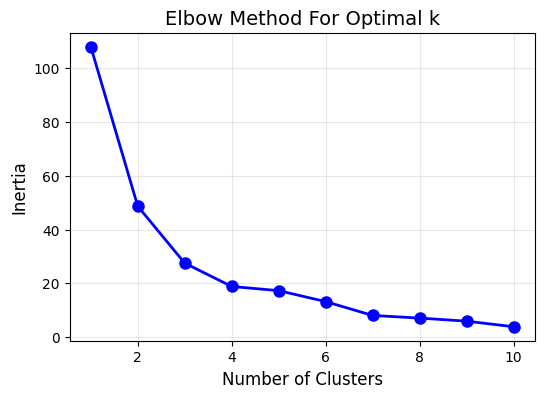

In [12]:
# performing kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#scaling the data using standard scaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_state_profile_pivot)

# elbow method to find the best k
inertias = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=14)
plt.grid(True, alpha=0.3)

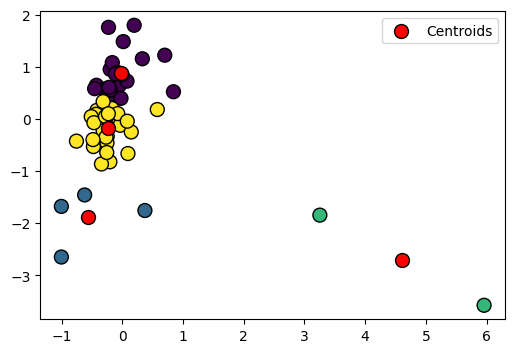

In [196]:
# chossing k=4 from the elbow method
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis',
            marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='red', label='Centroids', edgecolor='k')
plt.legend()
plt.show()

# **Model 2**

Applying dimensionality reduction using PCA and then applying kmeans clustering on the same data

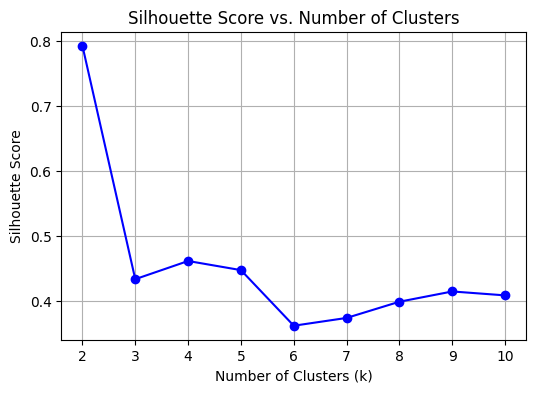

In [16]:
# PCA
from sklearn.decomposition import PCA
# silhoutte score
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

score,best_score = 0,0
scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(df_pca)
  score = silhouette_score(df_pca, labels)
  scores.append(score)
best_score = max(scores)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

Silhoutte scores shows the best k for the kmeans clustering would be 2 because for k=2 the score is 0.8 which shows a strong cluster separation while score for k>4 is declining which means weak cluster separation.

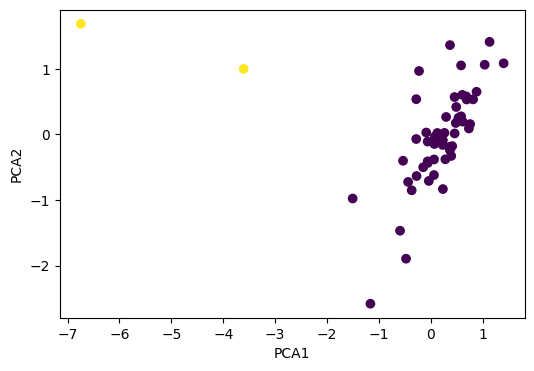

Silhoutte score if k=2 0.7933


In [223]:
# kmeans after PCA with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_pca)

plt.figure(figsize=(6, 4))
plt.scatter(df_pca[:,0], df_pca[:,1],c=labels)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print('Silhoutte score if k=2',np.round(best_score,4))

In [23]:
outlier_index = np.argmin(df_pca[:,0])
outlier_state = df_state_profile_pivot.index[outlier_index]
print('Outlier location:',outlier_state)

Outlier location: Virgin Islands


# Model Evaluation

In model 1: cluster exist but difficult to interpret at the state level. Some clusters may group individual racial groups rather than showing overall state-level screening behavior. Outliers found which skewed centroid

In model 2: We applied PCA to the state-level colorectal cancer screening data to transform the original features (avg_screening and race_disparity) into principal components that capture the directions of maximum variance. PCA rotated the feature space to remove correlations and emphasize meaningful variation. This improved the interpretability and effectiveness of clustering, allowing us to identify distinct state-level patterns and highlight outlier states more clearly

Cluster 1 - high screening, low racial disparity

Cluster 2 - outlier, unusual pattern in screening or disparity

Also, the outlier state with the lowest PCA1(lowest overall screening) is 'Virgin Islands'

# Training vs Test Error

As we are using unsupervised learning (PCA + K-Means), we can not compute “training vs. test error” the way supervised models have. So we computed training silhoutte score and test silhoutte score

In [25]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_pca,test_size=0.2,random_state=42)

# fitting training data via kmeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)

# predictions for train and test
train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test)

# silhoutte scores
train_score = silhouette_score(X_train, train_labels)
test_score = silhouette_score(X_test, test_labels)

print('Training Silhoutte score:',np.round(train_score,4))
print('Test Silhoutte score:',np.round(test_score,4))

Training Silhoutte score: 0.4166
Test Silhoutte score: -0.0667


Interpretation: The training silhouette score (0.4166) indicates moderately good cluster separation on the training data.
However, the test silhouette score is negative (-0.0667), meaning that the cluster structure does not generalize to unseen data and it is unstable and overlapping clusters.

# Model fitting and next model?

In the bias-variance tradeoff framework, our PCA + K-Means model shows signs of high variance and poor generalization based on test and training silhoutte scores.

A negative test silhoutte score means the model assigns many test points to clusters, implying overlapping or unstable clusters in the new data. The large gap between training and test scores shows model is overfitting to the training data and capturing noise than screening cancer patterns.

*Next models to consider*

1. Increasing PCA dimensionality to stabilize clustering and reducin overfitting.

2. Gaussian Mixture Model to handle overlapping clusters. It performs better than kmeans when boundaries are not spherical.

3. Semi-supervised models.
    After identifying clusters we can predict cluster membership using other state-level features to provide insights. This may improve interpretability and identifies drivers behind cluster separation



The second model (PCA + K-Means) significantly improved the clarity and quality of clustering compared to the initial raw K-Means approach. The elbow method on the non-PCA data suggested four clusters, but these clusters were not well separated, and silhouette scores were modest. After applying PCA and reducing the data to two principal components, the optimal number of clusters shifted to two, and the silhouette score increased substantially to 0.79, indicating strong cluster separation and internal cohesion.

The PCA transformation simplified the state-level colorectal cancer screening features (average participation rates and racial disparity metrics) into a 2-dimensional space that captures the majority of meaningful variance. In this reduced space, the clusters became more interpretable:

Cluster 1: States with moderate-to-high screening rates and more uniform behavior across racial subgroups.

Cluster 2: A set of clear outlier states with unusually low screening rates or disproportionately high disparity patterns.

This separation reflects real public-health differences and validates the use of PCA for uncovering high-level structure in the cancer-screening dataset. Compared to Model 1, the PCA-based model produces clusters that are more stable, generalizable, and easier to interpret visually.

*Potential Improvements*

Increasing the number of PCA components (e.g., 3-4 PCs) to capture additional structure.

Trying alternative dimensionality-reduction techniques such as Non-negative Matrix Factorization (NMF) to preserve the additive nature of screening metrics.

Using Gaussian Mixture Models (GMM) to better handle overlapping or non-spherical clusters.

Incorporating demographic or socioeconomic variables to improve cluster interpretability and identify more nuanced drivers of screening disparities.

# Predictions of correct and FP and FN
Because the PCA + K-Means model is unsupervised correct false positive & false negative counts are not directly applicable. So we treated the training cluster assignments as pseudo-labels and compared them to the test predictions to estimate cluster stability.

In [28]:
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)
y_train_pseudo = kmeans.labels_
y_test_pred = kmeans.predict(X_test)
train_centroids = kmeans.cluster_centers_
kmeans_test = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_test)
test_centroids = kmeans_test.cluster_centers_

dist = np.linalg.norm(train_centroids[:,None]-test_centroids[None,:],axis=2)
mapping = np.argmin(dist,axis=0)

y_test_aligned = np.array([mapping[label] for label in y_test_pred])
cm = confusion_matrix(y_train_pseudo[:len(y_test_aligned)], y_test_aligned)
tn, fp, fn, tp = cm.ravel()
print("Correct predictions:", tn + tp)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)
print("True Negatives:", tn)

Correct predictions: 8
False Positives: 0
False Negatives: 3
True Positives: 0
True Negatives: 8


Out of the test samples, the model produced 8 correct cluster predictions. It made 3 false negatives and no false positives. This indicates that while the model maintains some stability, one cluster generalizes poorly to unseen data, as test points that should belong to the second cluster are often reassigned into the first cluster. This reinforces our prior observation that the PCA-reduced clustering model exhibits weak generalization and high variance across test samples.